<a href="https://colab.research.google.com/github/ddopp4877/single-cell-tuning/blob/main/Inhomogenous_Poisson_input(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --quiet bmtk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.7/804.7 kB 6.7 MB/s eta 0:00:00


In [2]:
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
PFR = pd.read_csv("pyrFiringRateAvg.csv",delimiter=",")

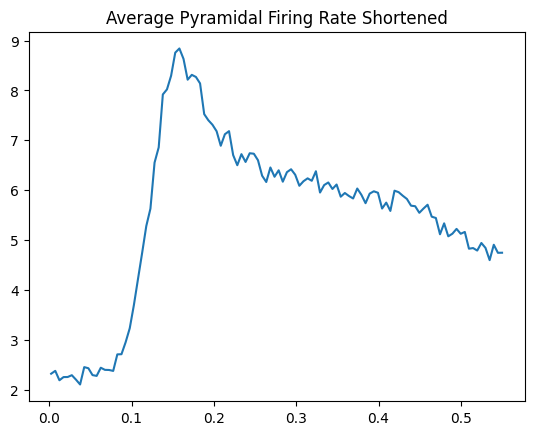

In [4]:
PFR_time_shortened = np.array(PFR['Time'][PFR['Time'] >0])
PFR_firing_rate_shortened = np.array(PFR['AvgFiringRate'][PFR['Time'] >0])
plt.plot(PFR_time_shortened,PFR_firing_rate_shortened)
plt.title("Average Pyramidal Firing Rate Shortened")
plt.show()

In [72]:
num_neurons = 10000
psg = PoissonSpikeGenerator(population='example_pop', seed=32)

for i in range(num_neurons):
    psg.add(
        node_ids=i,
        firing_rate=PFR_firing_rate_shortened,
        times=PFR_time_shortened
    )

spikes_df = psg.to_dataframe()
print(f"Generated {len(spikes_df)} spikes across {num_neurons} neurons")

firing_rates = []
# Now loop over actual neuron IDs
for node_id in range(num_neurons):
    cell_spikes = spikes_df[spikes_df['node_ids'] == node_id]
    duration = PFR_time_shortened[-1] - PFR_time_shortened[0]
    firing_rate = len(cell_spikes) / duration
    firing_rates.append(firing_rate)
    print(f"Neuron {node_id}: {len(cell_spikes)} spikes, mean rate = {firing_rate:.2f} Hz")

Streaming output truncated to the last 5000 lines.
Neuron 5000: 1 spikes, mean rate = 1.83 Hz
Neuron 5001: 5 spikes, mean rate = 9.13 Hz
Neuron 5002: 1 spikes, mean rate = 1.83 Hz
Neuron 5003: 1 spikes, mean rate = 1.83 Hz
Neuron 5004: 4 spikes, mean rate = 7.30 Hz
Neuron 5005: 4 spikes, mean rate = 7.30 Hz
Neuron 5006: 3 spikes, mean rate = 5.48 Hz
Neuron 5007: 4 spikes, mean rate = 7.30 Hz
Neuron 5008: 1 spikes, mean rate = 1.83 Hz
Neuron 5009: 6 spikes, mean rate = 10.96 Hz
Neuron 5010: 5 spikes, mean rate = 9.13 Hz
Neuron 5011: 2 spikes, mean rate = 3.65 Hz
Neuron 5012: 3 spikes, mean rate = 5.48 Hz
Neuron 5013: 2 spikes, mean rate = 3.65 Hz
Neuron 5014: 4 spikes, mean rate = 7.30 Hz
Neuron 5015: 3 spikes, mean rate = 5.48 Hz
Neuron 5016: 5 spikes, mean rate = 9.13 Hz
Neuron 5017: 2 spikes, mean rate = 3.65 Hz
Neuron 5018: 2 spikes, mean rate = 3.65 Hz
Neuron 5019: 3 spikes, mean rate = 5.48 Hz
Neuron 5020: 6 spikes, mean rate = 10.96 Hz
Neuron 5021: 5 spikes, mean rate = 9.13 Hz
N

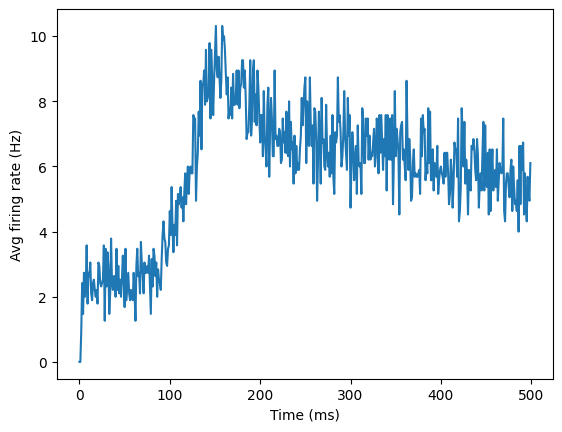

In [98]:
# Define time bins (assuming ms timestamps and 1 ms bins)
bin_size = 1  # in ms
times = np.arange(0, 500 + bin_size, bin_size)

# Histogram of spike counts per bin
spike_counts, _ = np.histogram(spikes_df['timestamps'], bins=times)

# Optional: Normalize to get firing rate
# If you have N neurons and you want average firing rate per neuron:
N_NEURONS = len(spikes_df['node_ids'].unique())
spike_rate = spike_counts / (bin_size / 1000) / N_NEURONS  # Convert ms to seconds

plt.plot(times[:-1], spike_rate)
plt.xlabel("Time (ms)")
plt.ylabel("Avg firing rate (Hz)")
plt.show()

In [103]:
downsampled_spike_rate = []
for i in range(len(spike_rate)):
  if i%5 ==0:
    downsampled_spike_rate.append(spike_rate[i])

In [110]:
np.corrcoef(downsampled_spike_rate,PFR_firing_rate_shortened[:-10])

array([[1.        , 0.90990587],
       [0.90990587, 1.        ]])

In [ ]:
# Calculate expected statistics
duration = PFR_time_shortened[-1] - PFR_time_shortened[0]
mean_firing_rate = np.mean(PFR_firing_rate_shortened)
expected_spikes = mean_firing_rate * duration

print(f"Duration: {duration:.2f} seconds")
print(f"Mean target firing rate: {mean_firing_rate:.2f} Hz")
print(f"Expected spikes per neuron: {expected_spikes:.2f}")
print(f"Expected std deviation: {np.sqrt(expected_spikes):.2f}")

# Actual statistics
spike_counts = [len(spikes_df[spikes_df['node_ids'] == i]) for i in range(num_neurons)]
print(f"Actual spike counts: {spike_counts}")
print(f"Actual mean: {np.mean(spike_counts):.2f}")
print(f"Actual std: {np.std(spike_counts):.2f}")

Duration: 0.55 seconds
Mean target firing rate: 5.48 Hz
Expected spikes per neuron: 3.00
Expected std deviation: 1.73
Actual spike counts: [1, 5, 6, 4, 7, 6, 4, 3, 4, 0]
Actual mean: 4.00
Actual std: 2.10


In [ ]:
num_neurons = 1000
psg = PoissonSpikeGenerator(population='example_pop', seed=32)

for i in range(num_neurons):
    psg.add(
        node_ids=i,
        firing_rate=PFR_firing_rate_shortened,
        times=PFR_time_shortened
    )

spikes_df = psg.to_dataframe()
# Calculate expected statistics
duration = PFR_time_shortened[-1] - PFR_time_shortened[0]
mean_firing_rate = np.mean(PFR_firing_rate_shortened)
expected_spikes = mean_firing_rate * duration

print(f"Duration: {duration:.2f} seconds")
print(f"Mean target firing rate: {mean_firing_rate:.2f} Hz")
print(f"Expected spikes per neuron: {expected_spikes:.2f}")
print(f"Expected std deviation: {np.sqrt(expected_spikes):.2f}")

# Actual statistics
spike_counts = [len(spikes_df[spikes_df['node_ids'] == i]) for i in range(num_neurons)]
print(f"Actual spike counts: {spike_counts}")
print(f"Actual mean: {np.mean(spike_counts):.2f}")
print(f"Actual std: {np.std(spike_counts):.2f}")

Duration: 0.55 seconds
Mean target firing rate: 5.48 Hz
Expected spikes per neuron: 3.00
Expected std deviation: 1.73
Actual spike counts: [1, 5, 6, 4, 7, 6, 4, 3, 4, 0, 1, 4, 1, 4, 5, 3, 4, 2, 2, 4, 2, 2, 1, 1, 3, 3, 5, 3, 5, 5, 2, 3, 0, 1, 1, 2, 4, 4, 1, 0, 3, 3, 0, 6, 2, 0, 3, 0, 4, 3, 4, 3, 4, 4, 2, 4, 3, 4, 2, 2, 2, 1, 3, 2, 0, 4, 2, 3, 3, 5, 2, 3, 4, 6, 4, 0, 4, 4, 4, 3, 2, 2, 2, 3, 4, 2, 4, 1, 3, 2, 2, 2, 3, 3, 1, 3, 2, 3, 3, 6, 2, 5, 3, 3, 2, 2, 4, 5, 1, 3, 6, 5, 2, 3, 3, 4, 3, 0, 3, 3, 2, 5, 4, 4, 1, 3, 3, 4, 4, 2, 1, 4, 2, 0, 3, 0, 5, 4, 6, 2, 3, 1, 2, 6, 4, 0, 5, 5, 2, 1, 1, 1, 0, 4, 6, 3, 2, 3, 6, 3, 1, 2, 4, 3, 2, 3, 5, 4, 2, 0, 2, 9, 3, 2, 5, 2, 3, 1, 7, 2, 1, 4, 6, 1, 6, 4, 1, 3, 2, 3, 7, 5, 6, 3, 4, 4, 2, 3, 3, 2, 2, 6, 1, 2, 4, 0, 1, 0, 2, 2, 0, 3, 2, 3, 3, 1, 2, 4, 1, 5, 4, 7, 2, 3, 6, 6, 4, 4, 1, 3, 2, 2, 2, 3, 2, 2, 4, 2, 2, 4, 5, 4, 4, 5, 2, 1, 4, 2, 2, 2, 4, 2, 3, 4, 6, 5, 2, 1, 3, 2, 2, 1, 2, 3, 2, 4, 1, 1, 2, 5, 0, 3, 3, 3, 2, 6, 3, 8, 3, 3, 2, 3, 1, 2, 8, 4, 2,